# Use case-3 : Predict Customer Sentiment

**Project Objective:The main aim of this project is to clasify customer sentiments:**

    -- POSITIVE SENTIMENT
    -- NEGATIVE SENTIMENT
    -- NEUTRAL SENTIMENT

**Lifecycle In A Data Science Projects**

    -- Data Analysis
    -- Feature Engineering
    -- Feature Selection
    -- Model Building
    -- Model Deployment

 **Breakdown of this notebook:**
 
    -- Loading the dataset: Load the data and import the libraries.
    -- Data Preprocessing:
        a. Analysing missing data.
        b. Balancing the data.
        c. Removing redundant columns.
    -- Visualising and counting sentiments of tweets for each airline.
    -- Wordcloud plots for positive and negative tweets to visualise most frequent words for each.
    -- Analysing the reasons for negative tweets for each airline.
    -- Visualising negative tweet-sentiment relationship with dates.
    -- Predicting the tweet sentiments with tweet text data with:
        a. Decision Tree Classifier
        b. Random Forest Classifier
    -- Calculating accuracies, plotting the confusion matrix and comparing the models.



# Data Analysis

In [173]:
# importing the dependencies
import pandas as pd
import numpy as np
import re

# plots
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# nlp
import tweepy
from nltk.corpus import stopwords
from wordcloud import WordCloud,STOPWORDS
from nltk.tokenize import word_tokenize

# algorithms
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [174]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /home/shritid/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/shritid/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [175]:
# loading data
airline_data_df = pd.read_csv(r"Usecase3_Dataset.csv")

In [176]:
airline_data_df

,airline_sentiment,airline,text
0,neutral,Virgin America,@VirginAmerica What @dhepburn said.
1,positive,Virgin America,@VirginAmerica plus you've added commercials t...
2,neutral,Virgin America,@VirginAmerica I didn't today... Must mean I n...
3,negative,Virgin America,@VirginAmerica it's really aggressive to blast...
4,negative,Virgin America,@VirginAmerica and it's a really big bad thing...
...,...,...,...
14635,positive,American,@AmericanAir thank you we got on a different f...
14636,negative,American,@AmericanAir leaving over 20 minutes Late Flig...
14637,neutral,American,@AmericanAir Please bring American Airlines to...
14638,negative,American,"@AmericanAir you have my money, you change my ..."


# EDA - Exploratory Data Analysis and Data Preprocessing

In [177]:
airline_data_df.shape

(14640, 3)

In [178]:
airline_data_df.columns

Index(['airline_sentiment', 'airline', 'text'], dtype='object')

In [179]:
# storing the sentiment in a variable.
AIRLINE_SENTIMENT = 'airline_sentiment'

In [180]:
# Checking the various types of sentiments in data
airline_data_df[AIRLINE_SENTIMENT].unique()

array(['neutral', 'positive', 'negative'], dtype=object)

In [181]:
# Checking the % distribution of the sentiments in data set
airline_data_df[AIRLINE_SENTIMENT].value_counts()/len(airline_data_df)*100

negative    62.691257
neutral     21.168033
positive    16.140710
Name: airline_sentiment, dtype: float64

In [182]:
# We can see the data is unbalanced. Majority of data is for negative class

In [183]:
#total cells with missing values
airline_data_df.isnull().sum()

airline_sentiment    0
airline              0
text                 0
dtype: int64

# vizualization of data

**Airline sentiments for each airline:**

    Step1: Calculating the total number of tweets for each airline (pie chart).
    Step2: Vizualizing the sentiments distribution airline wise (barcharts).
    Step3: Vizualize frequently used words in Negative and Positive tweets. (wordcloud)
    Step4: Calculating the frequency count for postive tweets
  This will give us a clearer idea about the airline sentiments , airlines relationship

In [184]:
# Finding out the airline operator names. 
airline_data_df['airline'].unique()

array(['Virgin America', 'United', 'Southwest', 'Delta', 'US Airways',
       'American'], dtype=object)

In [185]:
# Finding out the count of tweets for each airline in descending order.
print("Tweets distribution for each airline: ")
airline_distribution = airline_data_df.groupby('airline')['airline_sentiment'].count().sort_values(ascending=False)
airline_distribution

Tweets distribution for each airline: 


airline
United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline_sentiment, dtype: int64

# Pie Chart
-- to vizualize the % age distribution of tweets for each airline

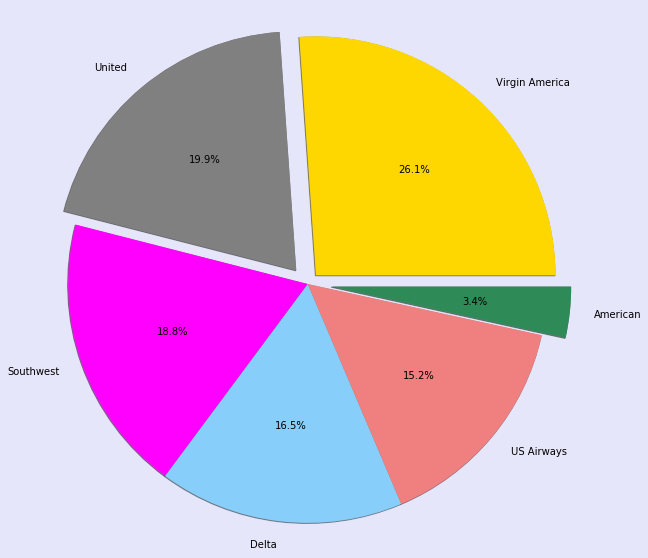

In [186]:
# Data to plot stored in variables
labels = 'Virgin America', 'United', 'Southwest', 'Delta', 'US Airways','American'
colors = ['gold', 'grey', 'magenta', 'lightskyblue', 'lightcoral', 'seagreen']
explode = (0.4, 0.6, 0, 0, 0 ,0.8)  # explode 1st,2nd and last slice

# Pie - Plot
plt.figure(1,figsize=(10, 10),facecolor='lavender',edgecolor='brown')
plt.pie(airline_distribution,explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, frame=False, radius=8)

plt.axis('equal')
plt.show()

# Bar Chart
-- Distribution of each sentiment(negative, positive, neutral) in each airline

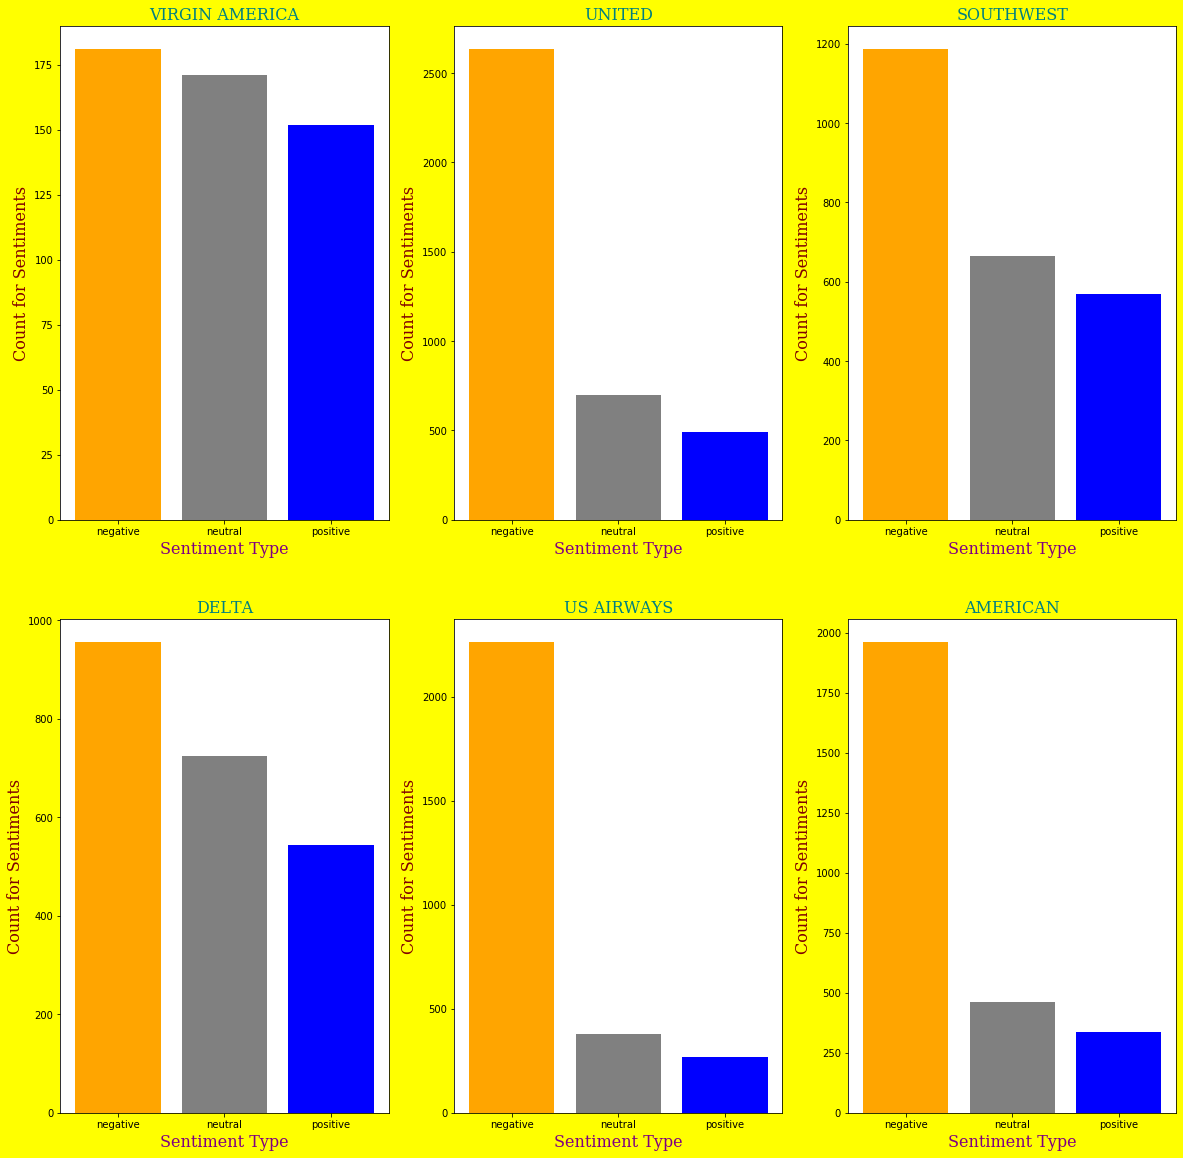

In [187]:
# Plotting the sentiment distribution airline wise
airlines= ['Virgin America', 'United', 'Southwest', 'Delta', 'US Airways','American']
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }

plt.figure(1,figsize=(20, 20),facecolor='yellow',edgecolor='brown')
for i in airlines:
    indices= airlines.index(i)
    plt.subplot(2,3,indices+1)
    new_airline_data_df=airline_data_df[airline_data_df['airline']==i]
    count=new_airline_data_df['airline_sentiment'].value_counts()
    Index = [1,2,3]
    plt.bar(Index,count, color=['orange', 'grey', 'blue'])
    plt.xticks(Index,['negative','neutral','positive'])
    plt.ylabel('Count for Sentiments',color='maroon',fontdict=font)
    plt.xlabel('Sentiment Type', fontdict=font, color='purple')
    plt.title(i.upper(), color='teal',fontdict=font)

## Analysis
-- US Airways, American and United airlines negative reactions.
-- Tweets for Virgin America and Delta are the most balanced.

# Data Pre-Processing

In [188]:
airline_data_df.dtypes

airline_sentiment    object
airline              object
text                 object
dtype: object

In [189]:
# Changing the case for all the sentiments to lower case
airline_data_df['sentiment_filtered']=airline_data_df['text'].str.lower()

In [190]:
# Removing special characters
airline_data_df['sentiment_filtered']=airline_data_df['sentiment_filtered'].apply(lambda x: x.replace('#',''))

In [191]:
# Converting to Bag of Words or Tokens
def convert_tweets_to_bag_of_words(tweets):
    letters_only = re.sub("[^a-zA-Z]", " ",tweets) 
    words = letters_only.split()                             
    stops = set(stopwords.words("english"))                  
    meaningful_words = [w for w in words if not w in stops] 
    return( " ".join( meaningful_words )) 

In [192]:
airline_data_df['clean_tweet_tokens']=airline_data_df['sentiment_filtered'].apply(lambda x: convert_tweets_to_bag_of_words(x))

In [193]:
airline_data_df.sample(10)

,airline_sentiment,airline,text,sentiment_filtered,clean_tweet_tokens
8895,positive,Delta,@JetBlue Thank you that it is not just a liver...,@jetblue thank you that it is not just a liver...,jetblue thank livery culture crewmembers embod...
635,negative,United,@united Fingers crossed &amp; its all intact. ...,@united fingers crossed &amp; its all intact. ...,united fingers crossed amp intact disappointed...
5302,positive,Southwest,@SouthwestAir DM sent. Thanks for the help!,@southwestair dm sent. thanks for the help!,southwestair dm sent thanks help
5267,negative,Southwest,@SouthwestAir my wife is trying to get a group...,@southwestair my wife is trying to get a group...,southwestair wife trying get group clients des...
10435,negative,US Airways,@USAirways husband tried to use dividends &amp...,@usairways husband tried to use dividends &amp...,usairways husband tried use dividends amp comp...
5305,positive,Southwest,@SouthwestAir @bgr1061 luv SWA myself and my e...,@southwestair @bgr1061 luv swa myself and my e...,southwestair bgr luv swa employees use always
4411,negative,Southwest,@SouthwestAir where your airline people screwe...,@southwestair where your airline people screwe...,southwestair airline people screwed boarding p...
10002,negative,US Airways,@USAirways spent 1.5 hours in line trying to g...,@usairways spent 1.5 hours in line trying to g...,usairways spent hours line trying get flight h...
7154,negative,Delta,nope. RT @JetBlue: Our fleet's on fleek. http:...,nope. rt @jetblue: our fleet's on fleek. http:...,nope rt jetblue fleet fleek http co shhtvioti
7105,neutral,Delta,STAHP!! 😂😂😭😭😭😭 RT @JetBlue Our fleet's on flee...,stahp!! 😂😂😭😭😭😭 rt @jetblue our fleet's on flee...,stahp rt jetblue fleet fleek http co bm unraoni



## Wordcloud 

-- The size of the words appearing in the wordcloud depends on the fequency of that word.

In [194]:
# Remove Stop words
stop_words= set(stopwords.words('english'))

# Words that are occuring frequently but not needed for frequency
ignore_words = set(['americanair','@', 'virginamerica','united','usairways','southwestair','jetblue','http','flight','amp','get'])

# Combining both the sets
union_ignorewords_stopwords = ignore_words.union(stop_words) 

**Frequently used words in Negative tweets**

In [195]:
def sentiment_wordcloud(sentiment):
    new_airline_data_df=airline_data_df[airline_data_df['airline_sentiment'] == sentiment]
    all_tweets = ' '.join(new_airline_data_df['clean_tweet_tokens'])
    tweet_words = all_tweets.split()

    selected_words = (word for word in tweet_words if word not in union_ignorewords_stopwords)

    final_sentence = ' '.join(selected_words)
    
    wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='black',
                          width=3000,
                          height=2500
                         ).generate(final_sentence)
    plt.figure(1,figsize=(12, 12))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    return final_sentence
    

**Wordcloud for negative sentiments tweet**

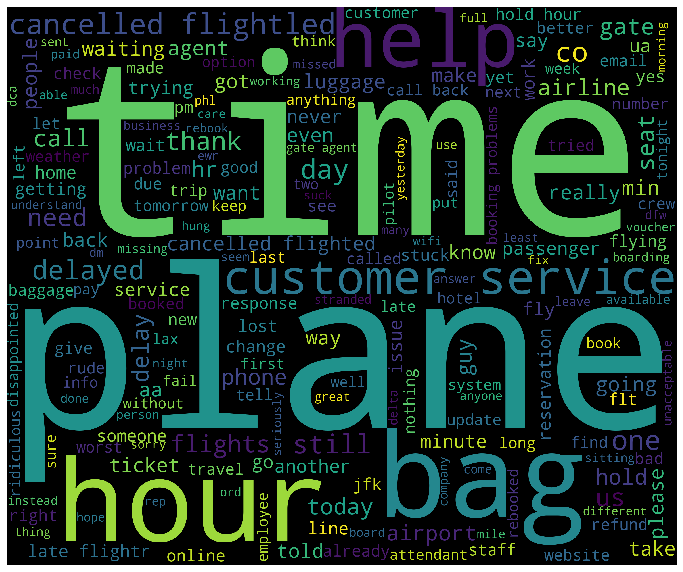

In [196]:
final_sentence_neg = sentiment_wordcloud('negative')


**Wordcloud for positive sentiments tweet**

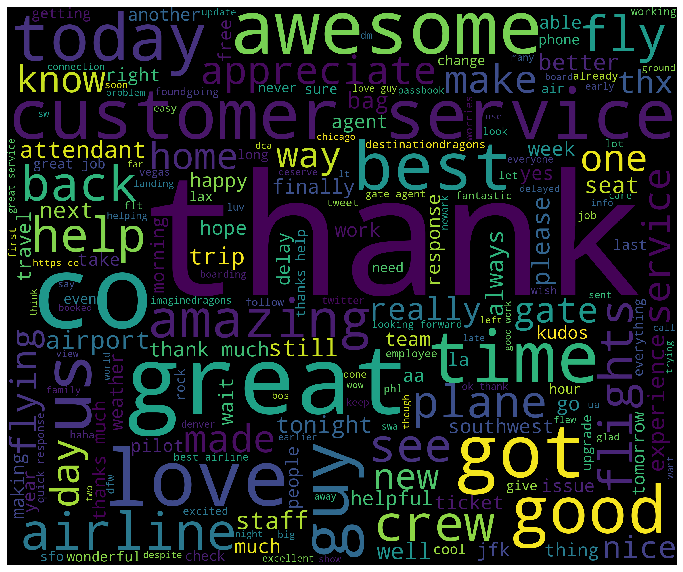

In [197]:
final_sentence_positive = sentiment_wordcloud('positive')

**Wordcloud for neutral sentiments tweet**

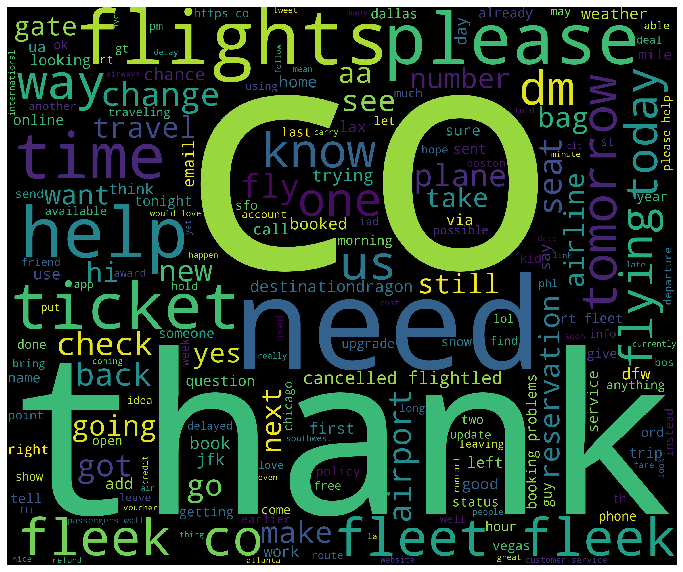

In [198]:
final_sentence_neutral = sentiment_wordcloud('neutral')

# Frequency

In [199]:
wordlist_neg = final_sentence_neg.split()
wordlist_positive = final_sentence_positive.split()

In [200]:
from collections import defaultdict
from itertools import islice

In [201]:
def get_top_n_frequencies(wordlist, n):

    wordfreq = defaultdict(int)

    for w in wordlist:
        wordfreq[w] += 1
    
    wordfreq = sorted(wordfreq.items(), key = lambda x: x[1], reverse = True)
    return wordfreq[:n]

**Top 40 most frequency of each Negative word in negative tweet**

In [202]:
word_frequencies_neg=get_top_n_frequencies(wordlist_neg, 40)
print("Pairs\n", word_frequencies_neg)

Pairs
 [('cancelled', 926), ('service', 750), ('hours', 659), ('help', 619), ('hold', 614), ('customer', 614), ('time', 599), ('plane', 532), ('delayed', 507), ('us', 502), ('still', 492), ('call', 462), ('hour', 457), ('co', 455), ('flightled', 448), ('one', 442), ('flights', 420), ('bag', 419), ('gate', 411), ('late', 378), ('would', 377), ('back', 375), ('need', 374), ('phone', 369), ('waiting', 341), ('please', 328), ('thanks', 315), ('hrs', 300), ('got', 299), ('airline', 294), ('like', 292), ('trying', 288), ('never', 283), ('delay', 274), ('wait', 272), ('minutes', 271), ('today', 269), ('u', 266), ('day', 259), ('going', 253)]


**Top 20 most frequently used words in Positive tweets**

In [203]:
word_frequencies_positive=get_top_n_frequencies(wordlist_positive, 20)
print("Pairs\n", word_frequencies_positive)

Pairs
 [('thanks', 611), ('thank', 455), ('great', 236), ('co', 233), ('service', 162), ('love', 143), ('customer', 114), ('guys', 110), ('good', 109), ('much', 109), ('best', 105), ('awesome', 100), ('got', 100), ('time', 97), ('us', 91), ('help', 84), ('today', 83), ('airline', 81), ('amazing', 78), ('back', 73)]


 **Removing Punctuations, Numbers, and Special Characters**

In [204]:
airline_data_df.dtypes

airline_sentiment     object
airline               object
text                  object
sentiment_filtered    object
clean_tweet_tokens    object
dtype: object

In [205]:
# Converting 'Object' datatype to 'String'
airline_data_df['clean_tweet_tokens'] = airline_data_df['clean_tweet_tokens'].astype("string")

airline_data_df['clean_tweet'] = airline_data_df['clean_tweet_tokens'].apply(lambda x: x.split())

# Remove Stop words and other words
airline_data_df['clean_tweet'] = airline_data_df['clean_tweet'].apply(lambda x: [w for w in x if not w in union_ignorewords_stopwords])

In [206]:
airline_data_df.sample(10)

,airline_sentiment,airline,text,sentiment_filtered,clean_tweet_tokens,clean_tweet
4713,neutral,Southwest,@SouthwestAir Can my wife's RR points be trans...,@southwestair can my wife's rr points be trans...,southwestair wife rr points transferred rr acc...,"[wife, rr, points, transferred, rr, account]"
14220,negative,American,@AmericanAir not to mention its a three hour w...,@americanair not to mention its a three hour w...,americanair mention three hour wait get agent ...,"[mention, three, hour, wait, agent, phone]"
3889,negative,United,@united this is getting ridiculous. Now we're ...,@united this is getting ridiculous. now we're ...,united getting ridiculous missing connection,"[getting, ridiculous, missing, connection]"
12830,negative,American,@AmericanAir crew did the best they could but ...,@americanair crew did the best they could but ...,americanair crew best could control get one ch...,"[crew, best, could, control, one, chance, hone..."
6812,positive,Delta,"@JetBlue Annnndddd, I just booked my flight. T...","@jetblue annnndddd, i just booked my flight. t...",jetblue annnndddd booked flight easy,"[annnndddd, booked, easy]"
10968,negative,US Airways,@USAirways NEVER AGAIN! Worse experience in my...,@usairways never again! worse experience in my...,usairways never worse experience life http co ...,"[never, worse, experience, life, co, ddqq, gqni]"
5201,negative,Southwest,@SouthwestAir are ur flight still Cancelled Fl...,@southwestair are ur flight still cancelled fl...,southwestair ur flight still cancelled flight ...,"[ur, still, cancelled, nashville, tn, today, t..."
11702,positive,US Airways,@USAirways YOU ARE THE BEST AIRWAYS!!!!!!!!!! ...,@usairways you are the best airways!!!!!!!!!! ...,usairways best airways follow back please,"[best, airways, follow, back, please]"
2259,positive,United,@united tonight you made this Fred Flintstone ...,@united tonight you made this fred flintstone ...,united tonight made fred flintstone happy upgr...,"[tonight, made, fred, flintstone, happy, upgra..."
11993,negative,American,@AmericanAir that doesn't really answer my que...,@americanair that doesn't really answer my que...,americanair really answer question maybe provi...,"[really, answer, question, maybe, provide, det..."


# Building Classification Model

Train:Test split of data i.e 80:20.

    **Algorithms**
    Decision Tree Classifier
    Random Forest Classifier

In [207]:
#joining tokens
airline_data_df['clean_tweet'] = [' '.join(map(str, l)) for l in airline_data_df['clean_tweet']]

# Converting datatype from object to string
airline_data_df['clean_tweet'] = airline_data_df['clean_tweet'].astype("string")

In [208]:
train,test = train_test_split(airline_data_df,test_size=0.2,random_state=42)

In [209]:
train_clean_tweet=[]
for tweet in train['clean_tweet']:
    train_clean_tweet.append(tweet)
test_clean_tweet=[]
for tweet in test['clean_tweet']:
    test_clean_tweet.append(tweet)


In [210]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer(analyzer = "word")
train_features= v.fit_transform(train_clean_tweet)
test_features=v.transform(test_clean_tweet)

In [211]:
Classifiers = [
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=200)]

Accuracy of DecisionTreeClassifieris 0.6909153005464481
              precision    recall  f1-score   support

    negative       0.78      0.81      0.79      1815
     neutral       0.49      0.43      0.46       664
    positive       0.58      0.60      0.59       449

    accuracy                           0.69      2928
   macro avg       0.62      0.61      0.61      2928
weighted avg       0.68      0.69      0.69      2928



<Figure size 432x288 with 0 Axes>

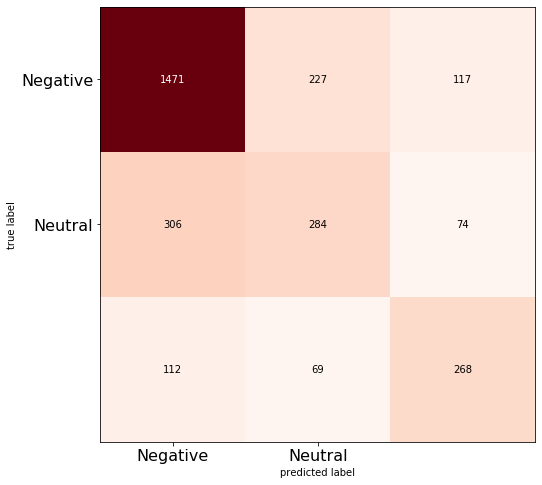

Accuracy of RandomForestClassifieris 0.7667349726775956
              precision    recall  f1-score   support

    negative       0.88      0.83      0.85      1987
     neutral       0.53      0.56      0.55       551
    positive       0.61      0.72      0.66       390

    accuracy                           0.77      2928
   macro avg       0.67      0.71      0.69      2928
weighted avg       0.78      0.77      0.77      2928



<Figure size 432x288 with 0 Axes>

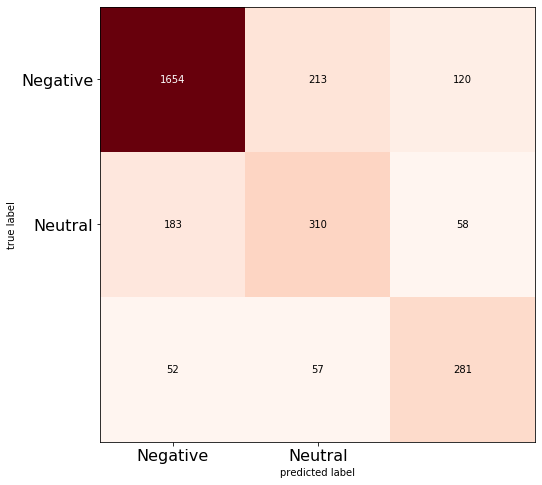

In [212]:
dense_features=train_features.toarray()
dense_test= test_features.toarray()
Accuracy=[]
Model=[]
for classifier in Classifiers:
    try:
        fit = classifier.fit(train_features,train['airline_sentiment'])
        pred = fit.predict(test_features)
    except Exception:
        fit = classifier.fit(dense_features,train['airline_sentiment'])
        pred = fit.predict(dense_test)
    accuracy = accuracy_score(pred,test['airline_sentiment'])
    Accuracy.append(accuracy)
    Model.append(classifier.__class__.__name__)
    print('Accuracy of '+classifier.__class__.__name__+'is '+str(accuracy))
    print(classification_report(pred,test['airline_sentiment']))
    cm=confusion_matrix(pred , test['airline_sentiment'])
    plt.figure()
    plot_confusion_matrix(cm,figsize=(12,8), hide_ticks=True,cmap=plt.cm.Reds)
    plt.xticks(range(2), ['Negative', 'Neutral', 'Positive'], fontsize=16,color='black')
    plt.yticks(range(2), ['Negative', 'Neutral', 'Positive'], fontsize=16)
    plt.show()

# Analysis of the classifiers

--Confusion matrix for predicted sentiments and actual sentiments (negative,neutral and positive)

**Accuracy**
-- Accuracy of DecisionTreeClassifier is 0.692964480874317
-- Accuracy of RandomForestClassifieris 0.7667349726775956

**Confusion Matrix**
-- Random Forest Classifier gives a better recall,precision and f-1 scores.(refer:classification report.
-- Random Forest Classifier show better result for TP,TN,FP,FN. 

